In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline


OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\raviiikesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

In [3]:
import numpy as np

def load_data():
    data = np.loadtxt("ex1data1.txt", delimiter=',')
    X = data[:,0]
    y = data[:,1]
    return X, y

def load_data_multi():
    data = np.loadtxt("ex1data2.txt", delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y

In [27]:
g = torch.Generator().manual_seed(2147483647 + 10)
a = torch.randn(1, generator=g, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
a, b

(tensor([0.0965], requires_grad=True), tensor([0.], requires_grad=True))

In [57]:
import time
optimizer = torch.optim.SGD([a, b], lr=0.0001)

In [45]:
lossfunc = torch.nn.MSELoss()

In [58]:
lossi = []
for i in range(30000):
  tic = time.time()
  ix = torch.randint(0, 96, (1,))
  x = torch.tensor(x_train[ix], dtype=torch.float32)
  y = torch.tensor(y_train[ix], dtype=torch.float32)
  out = a * x + b

  # loss = (out - y)**2
  # lossi.append(loss.item())
  # a.grad = None
  # b.grad = None

  # loss.backward()

  # a.data += -0.001*a.grad
  # b.data += -0.001*b.grad

  loss = lossfunc(out, y)
  lossi.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  toc = time.time()
  t = (toc-tic)*1000
  if i%3000 == 0:
    print(f"loss: {loss.item()}  time: {t:.2f}ms")

loss: 0.09879179298877716  time: 4.85ms
loss: 0.49154236912727356  time: 0.53ms
loss: 10.674200057983398  time: 0.44ms
loss: 0.4024886190891266  time: 0.48ms
loss: 0.29255759716033936  time: 0.75ms
loss: 8.906086921691895  time: 0.51ms
loss: 23.687829971313477  time: 0.47ms
loss: 24.509843826293945  time: 0.70ms
loss: 0.0032436931505799294  time: 0.73ms
loss: 3.810462713241577  time: 0.48ms


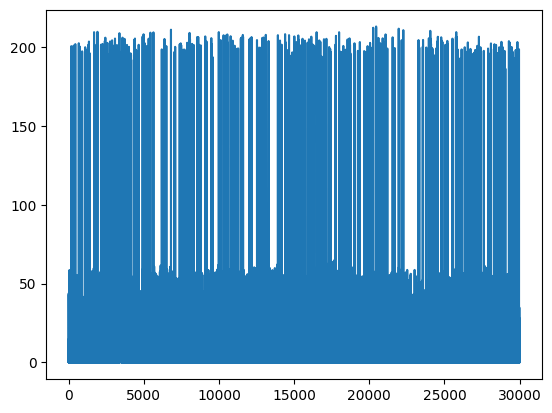

In [59]:
plt.plot(lossi)